# Exploratory Data Analysis - Global Terrorism

In [62]:
# importing the required libraries for the analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

'''
NumPy is a library for numerical and array operations in Python.
Matplotlib is a popular library for creating data visualizations, including plots and charts.
Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level 
interface for creating attractive and informative statistical graphics.
'''

## Data Collection: Gathering/Importing the data

In [2]:
terrorism = pd.read_csv("D:\Projects\Dataset\Global Terrorism Dataset.csv", encoding = 'latin-1')
pd.set_option('display.max_columns', None) # hide no column
terrorism.head()

C:\Users\Priyanshi Negi\AppData\Local\Temp\ipykernel_4940\2626255116.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism = pd.read_csv("D:\Projects\Dataset\Global Terrorism Dataset.csv", encoding = 'latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
terrorism.shape

(181691, 135)

In [4]:
terrorism.info()
# to get a concise summary of the DataFrame, 
# which includes information about the DataFrame's structure, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
terrorism.describe() # to generate descriptive statistics for numerical (or numeric) columns in a DataFrame

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

## Data Cleaning

In [6]:
is_null = terrorism.isnull() # returns boolean value
is_null

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,

In [7]:
# check for missing values
total_null = terrorism.isnull().sum()
total_null # a Pandas Series that provides the count of null values in each column of the terrorism DataFrame

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Null Imputation 

In [8]:
# We filter the DataFrame null_values using the Boolean Series generated in the comparision and
# select only the rows where the corresponding value is True.

null_values = terrorism.isnull().sum().to_frame(name="Empty")
null_values = null_values[null_values["Empty"]>0]
null_values

,Empty
approxdate,172452
resolution,179471
provstate,421
city,434
latitude,4556
...,...
addnotes,153402
scite1,66191
scite2,104758
scite3,138175


In [9]:
terrorism.notna().sum()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [10]:
# data cleaning
updated_terrorism = terrorism.dropna(axis = 1, thresh = 150000)

In [11]:
updated_terrorism.head(10)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0.0,0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0.0,0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,2,Government (General),21.0,Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,0.0,0,8,Incendiary,20.0,Gasoline or Alcohol,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0


In [12]:
# providing a value in place of null values
updated_terrorism = updated_terrorism.fillna('Unknown')
updated_terrorism.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,Unknown,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,Unknown,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,Unknown,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,Unknown,Unknown,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,Unknown,Unknown,Unknown,Unknown,1,0.0,PGIS,-9,-9,1,1


## Preprocessing 

In [13]:
updated_terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [14]:
updated_terrorism.shape

(181691, 47)

In [15]:
# renaming column names
updated_terrorism = updated_terrorism.copy()
updated_terrorism.rename(columns={"iyear":"Year", "imonth":"Month", "iday":"Day", "country":"CountryCode", 
                                  "country_txt":"Country", "region":"RegionCode", "region_txt":"Region", 
                                  "provstate":"State", "city":"City", "latitude":"Latitude", "longitude":"Longitude",
                                  "specificity":"Specificity", "success":"Success", "attacktype1":"AttackTypeCode", 
                                  "attacktype1_txt":"AttackType", "targtype1":"TargetTypeCode", "targtype1_txt":"TargetType", 
                                  "target1":"Target", "natlty1":"Nationality", "gname":"GroupName", "weaptype1":"WeaponCode", 
                                  "weaptype1_txt":"WeaponType", "nkill":"Killed", "nwound":"Wounded"}, inplace = True)

In [16]:
updated_terrorism.columns

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'CountryCode', 'Country',
       'RegionCode', 'Region', 'State', 'City', 'Latitude', 'Longitude',
       'Specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'Success', 'suicide', 'AttackTypeCode', 'AttackType',
       'TargetTypeCode', 'TargetType', 'targsubtype1', 'targsubtype1_txt',
       'Target', 'Nationality', 'natlty1_txt', 'GroupName', 'guncertain1',
       'individual', 'WeaponCode', 'WeaponType', 'weapsubtype1',
       'weapsubtype1_txt', 'Killed', 'Wounded', 'property', 'ishostkid',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [17]:
# filtering the DataFrame to include only the specified columns that are relevant to the analysis 
# by discarding any other columns that were originally present
updated_terrorism = updated_terrorism[['Year', 'Month', 'Day', 'CountryCode', 'Country', 'RegionCode', 'Region', 
                                       'State', 'City', 'Latitude', 'Longitude', 'Specificity', 'Success', 
                                       'AttackTypeCode', 'AttackType', 'TargetTypeCode', 'TargetType', 'Target', 
                                       'Nationality', 'GroupName', 'WeaponCode', 'WeaponType', 'Killed', 'Wounded']]
updated_terrorism.head()

,Year,Month,Day,CountryCode,Country,RegionCode,Region,State,City,Latitude,Longitude,Specificity,Success,AttackTypeCode,AttackType,TargetTypeCode,TargetType,Target,Nationality,GroupName,WeaponCode,WeaponType,Killed,Wounded
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,1,1,Assassination,14,Private Citizens & Property,Julio Guzman,58.0,MANO-D,13,Unknown,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),"Nadine Chaval, daughter",21.0,23rd of September Communist League,13,Unknown,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,1,1,Assassination,10,Journalists & Media,Employee,217.0,Unknown,13,Unknown,1.0,0.0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.762728,1.0,1,3,Bombing/Explosion,7,Government (Diplomatic),U.S. Embassy,217.0,Unknown,6,Explosives,Unknown,Unknown
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),U.S. Consulate,217.0,Unknown,8,Incendiary,Unknown,Unknown


In [18]:
updated_terrorism.shape

(181691, 24)

In [19]:
updated_terrorism.columns.to_list()

['Year',
 'Month',
 'Day',
 'CountryCode',
 'Country',
 'RegionCode',
 'Region',
 'State',
 'City',
 'Latitude',
 'Longitude',
 'Specificity',
 'Success',
 'AttackTypeCode',
 'AttackType',
 'TargetTypeCode',
 'TargetType',
 'Target',
 'Nationality',
 'GroupName',
 'WeaponCode',
 'WeaponType',
 'Killed',
 'Wounded']

In [20]:
updated_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   CountryCode     181691 non-null  int64 
 4   Country         181691 non-null  object
 5   RegionCode      181691 non-null  int64 
 6   Region          181691 non-null  object
 7   State           181691 non-null  object
 8   City            181691 non-null  object
 9   Latitude        181691 non-null  object
 10  Longitude       181691 non-null  object
 11  Specificity     181691 non-null  object
 12  Success         181691 non-null  int64 
 13  AttackTypeCode  181691 non-null  int64 
 14  AttackType      181691 non-null  object
 15  TargetTypeCode  181691 non-null  int64 
 16  TargetType      181691 non-null  object
 17  Target          181691 non-nu

## Processing and Data Visualization

In [21]:
print("Year with the most attacks: ", updated_terrorism['Year'].value_counts().idxmax())
# This line finds the year with the most attacks.
# value_counts() is used to count the occurrences of each unique year in the "Year" column and 
# then selecting the index (year) with the maximum count using idxmax().
print("Month with the most attacks: ", updated_terrorism['Month'].value_counts().idxmax())
print("Country with most attacks: ", updated_terrorism['Country'].value_counts().idxmax())
print("Region with the most attacks:", updated_terrorism['Region'].value_counts().idxmax())
print("State with most attacks: ", updated_terrorism['State'].value_counts().idxmax())
print("City with most attacks: ", updated_terrorism['City'].value_counts().index[1])
# In the above statement, we are selecting the index with the second-highest count (index[1]).
print("Most Attack Types:", updated_terrorism['AttackType'].value_counts().idxmax())
print("Most Target Types:", updated_terrorism['TargetType'].value_counts().idxmax())
print("Group with the most attacks:", updated_terrorism['GroupName'].value_counts().index[1])

Year with the most attacks:  2014
Month with the most attacks:  5
Country with most attacks:  Iraq
Region with the most attacks: Middle East & North Africa
State with most attacks:  Baghdad
City with most attacks:  Baghdad
Most Attack Types: Bombing/Explosion
Most Target Types: Private Citizens & Property
Group with the most attacks: Taliban


In [22]:
updated_terrorism['Year'].value_counts().sort_index()
# The resulting Series contains the counts of each unique value in the 'Year' column and 
# is sorted in ascending order based on the index (the years).

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

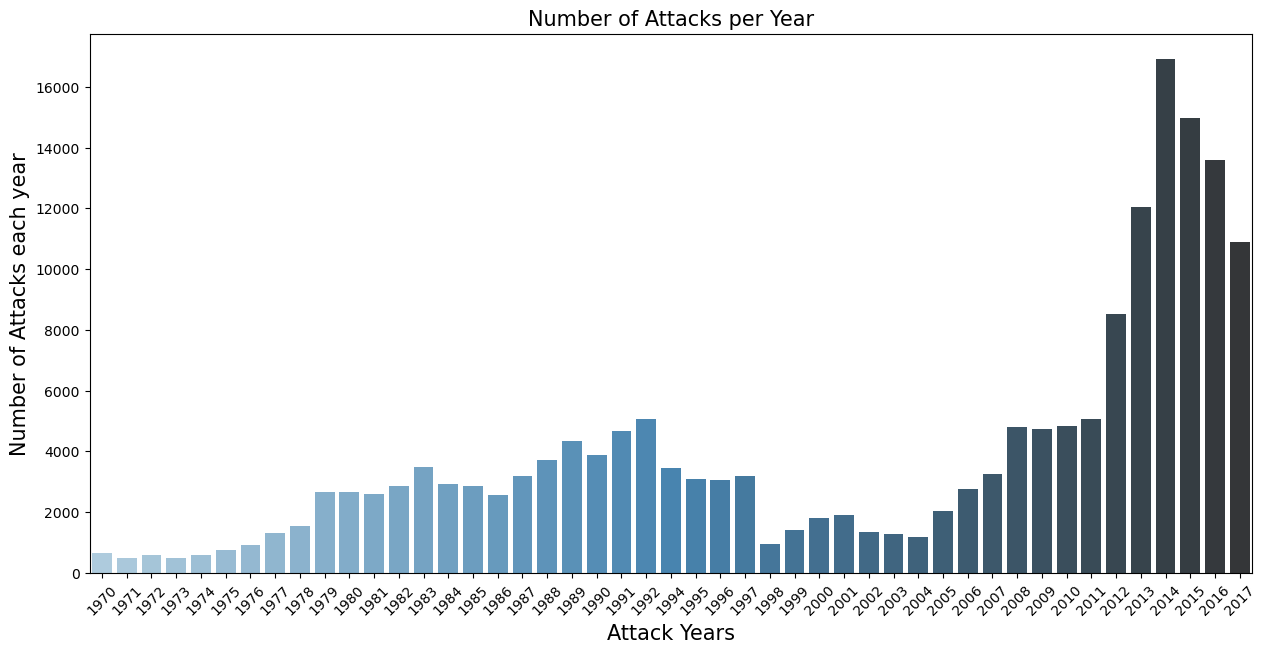

'\nNumPy is used to work with arrays when extracting values from the Pandas Series and creating y_year.\n\nMatplotlib is used to create the figure and customize various plot elements like the title, axis labels, and the x-axis label rotation. Additionally, plt.show() is used to display the plot.\n\nSeaborn is used for creating the bar plot using sns.barplot() and for setting the color palette.\n'

In [23]:
# Bar Plot
# Number of attacks each Year
x_year = updated_terrorism['Year'].unique()
y_year = updated_terrorism['Year'].value_counts().sort_index().values
# y_year = updated_terrorism['Year'].value_counts(dropna=False).sort_index(), to include missing or NaN (null) values in the count.

plt.figure(figsize=(15,7)) #width and height
plt.title("Number of Attacks per Year",fontsize=15)
plt.xlabel("Attack Years",fontsize=15)
plt.ylabel("Number of Attacks each year",fontsize=15)
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year, palette= 'Blues_d') # rocket flare plasma inferno magma
plt.show()
'''
NumPy is used to work with arrays when extracting values from the Pandas Series and creating y_year.

Matplotlib is used to create the figure and customize various plot elements like the title, axis labels, and the x-axis label rotation. Additionally, plt.show() is used to display the plot.

Seaborn is used for creating the bar plot using sns.barplot() and for setting the color palette.
'''

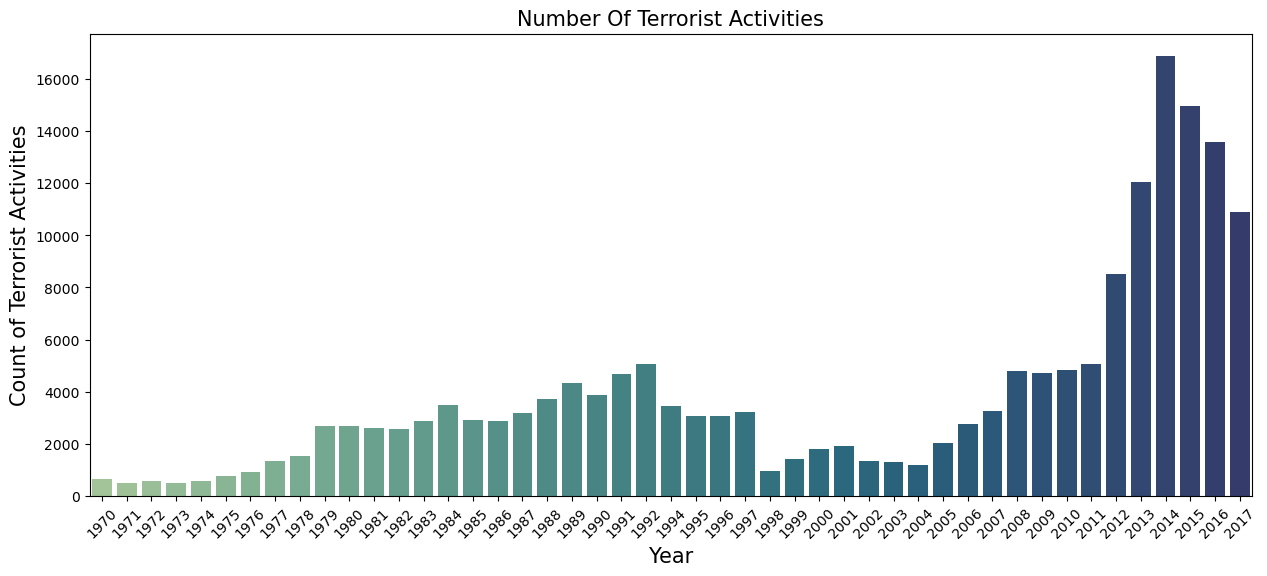

In [24]:
# Count Plot
# Number Of Terrorist Activities per Year
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=updated_terrorism, palette='crest')
plt.title('Number Of Terrorist Activities',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count of Terrorist Activities",fontsize=15)
plt.xticks(rotation=45)
plt.show()

#### Observation: The year 2014 witnessed the highest incidence of terrorist activities

In [25]:
# Terrorist attacks distribution across regions over time (from 1970-2017)
reg = pd.crosstab(updated_terrorism.Year,updated_terrorism.Region) # cross-tabulation of two (or more) factors
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


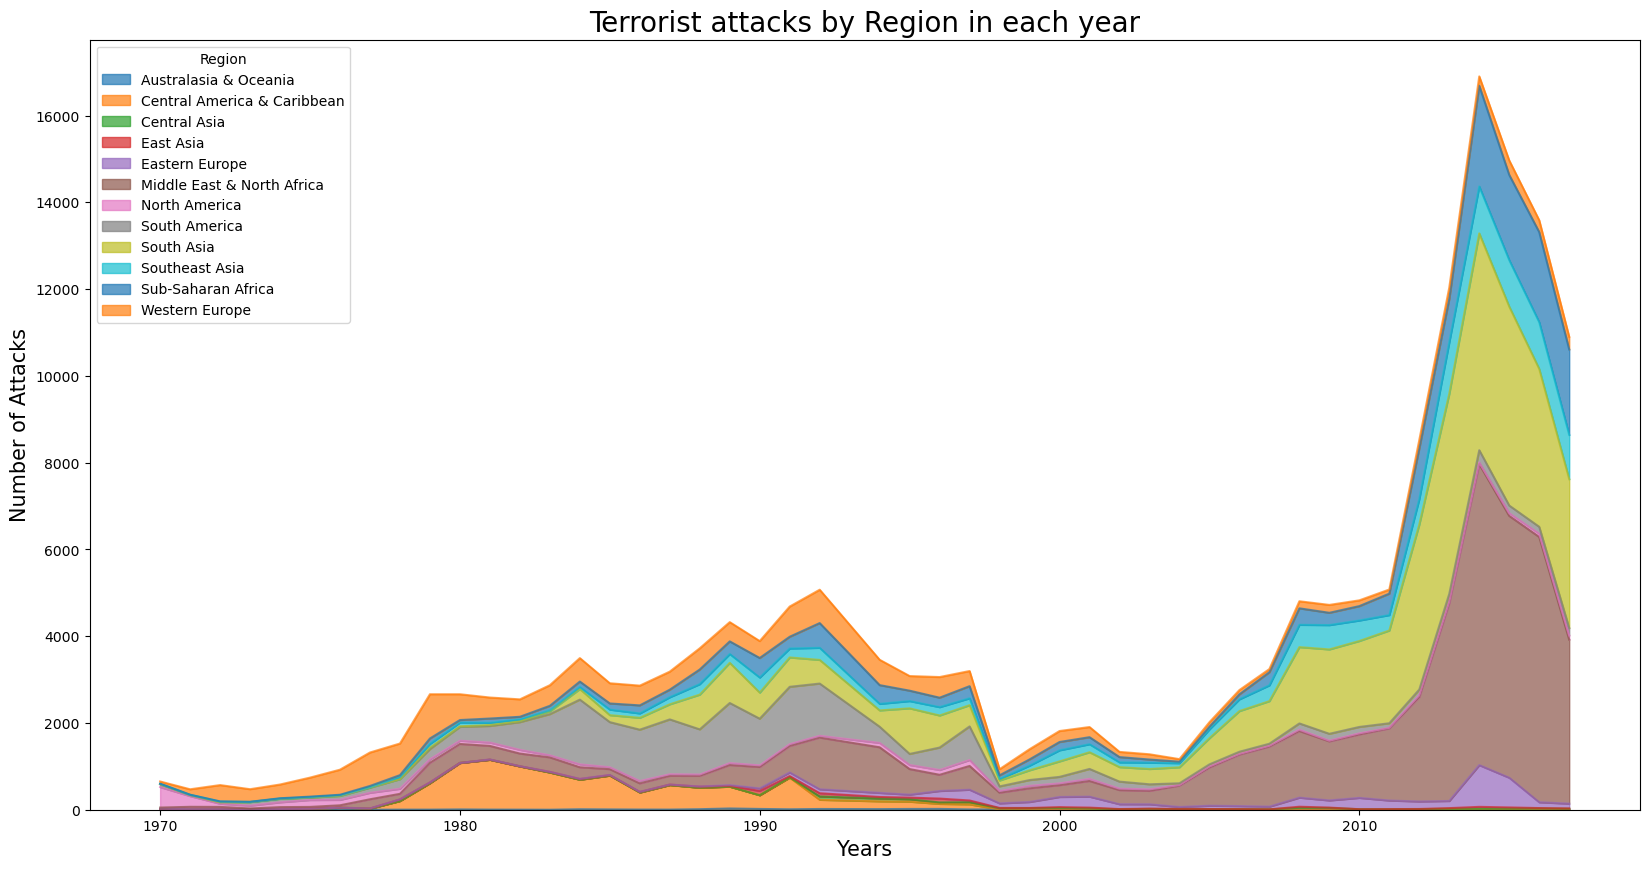

In [26]:
# Area plot: region-wise terrorist attacks
pd.crosstab(updated_terrorism.Year,updated_terrorism.Region).plot(kind="area",stacked=True,alpha=0.7,figsize=(20,10))
plt.title("Terrorist attacks by Region in each year",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [27]:
# Total Attacks in each Region
reg_tot=reg.transpose()
reg_tot["Total"]=reg_tot.sum(axis=1)
reg_tot=reg_tot["Total"].sort_values(ascending=False)
reg_tot

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

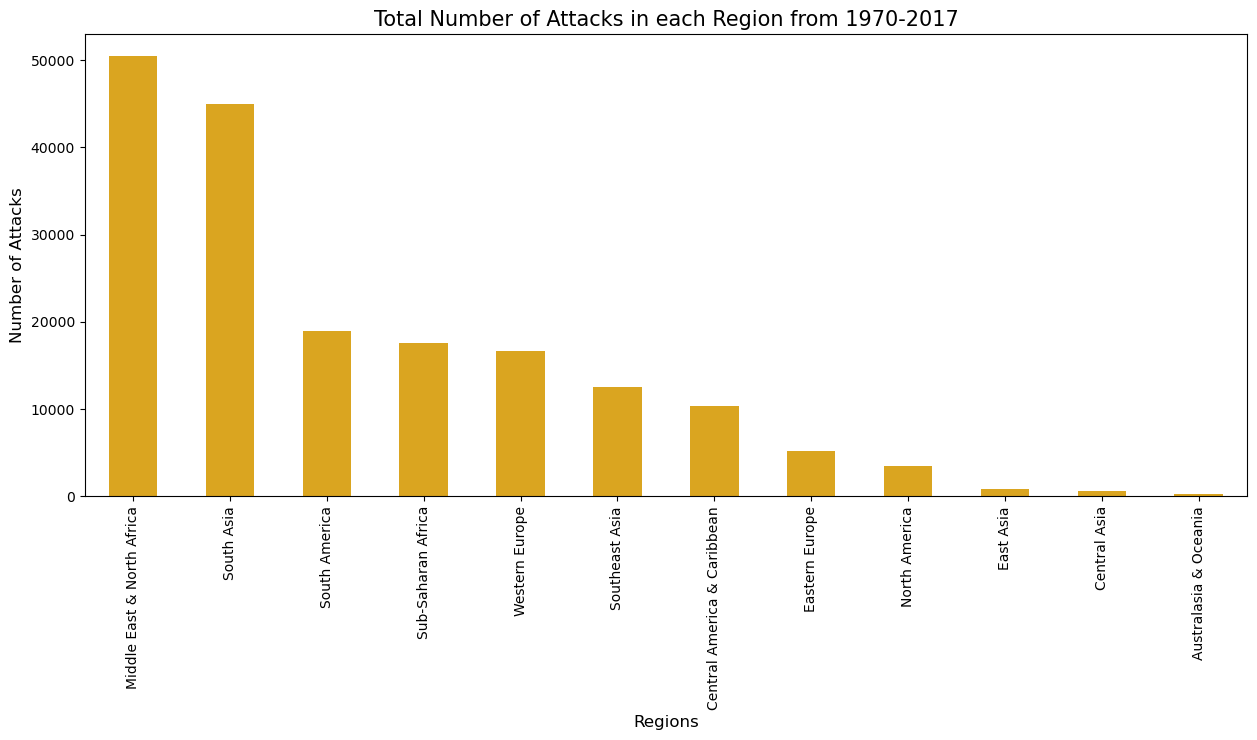

In [28]:
# Total Attacks in each Region
reg_tot.plot(kind="bar",figsize=(15,6), color='goldenrod')
plt.title("Total Number of Attacks in each Region from 1970-2017", fontsize=15)
plt.xlabel("Regions", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.show()

#### Observation: Middle East and North Africa regions have the highest number of terrorist attacks

In [29]:
# People Killed in each Region
regk = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'][['Region','Killed']].groupby('Region').sum().sort_values(by="Killed",ascending=False)
regk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [30]:
# People Wounded in each Region
regw = updated_terrorism[updated_terrorism['Wounded'] != 'Unknown'][["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
regw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


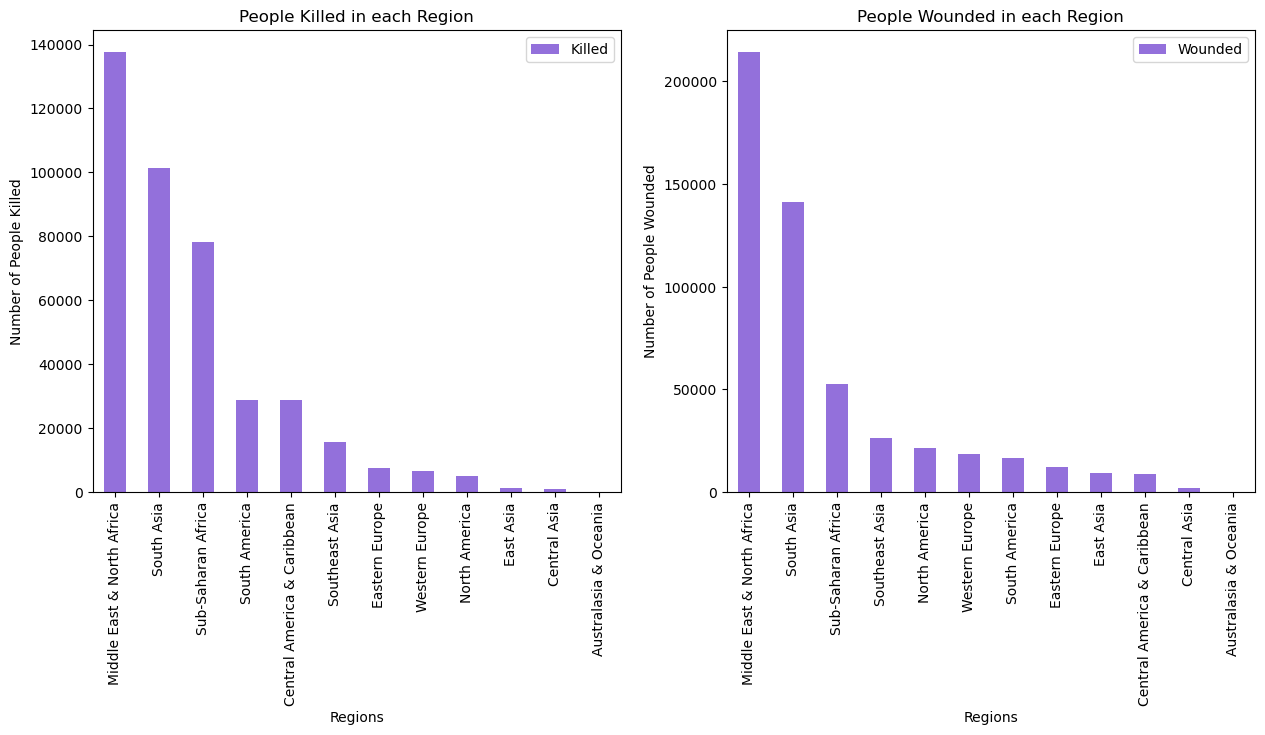

In [31]:
# People Killed and Wounded in each Region Visualization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1) # first subplot
ax1=fig.add_subplot(1,2,2) # second subplot
'''
These lines add two subplots to the figure, arranging them side by side. 
add_subplot is used to specify the position of the subplot within a grid. 
In this case, a 1x2 grid is created (1 row and 2 columns), 
and the subplots are added to the first and second positions.
'''

# People Killed in each region visualization
regk.plot(kind="bar",color="mediumpurple",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

# People Wounded in each region visualization
regw.plot(kind="bar",color="mediumpurple",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [32]:
# Countries affected by terrorism
attack_country = updated_terrorism['Country'].value_counts()[:15] #head(15)
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

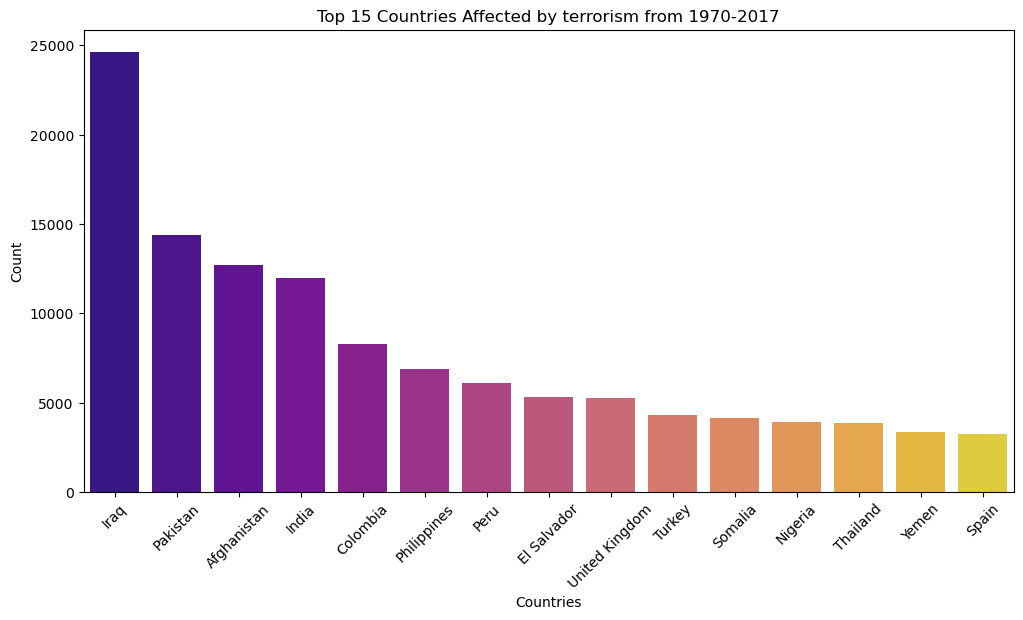

In [33]:
# Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_country.index,y=attack_country.values,palette='plasma')
plt.title('Top 15 Countries Affected by terrorism from 1970-2017')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

#### Observation: Iraq is the most affected country of all time

In [34]:
# People Killed in each Country
ck = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'][['Country','Killed']].groupby('Country').sum().sort_values(by="Killed",ascending=False)
ck.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [35]:
# People Wounded in each Country
cw = updated_terrorism[updated_terrorism['Wounded'] != 'Unknown'][['Country','Wounded']].groupby('Country').sum().sort_values(by="Wounded",ascending=False)
cw.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


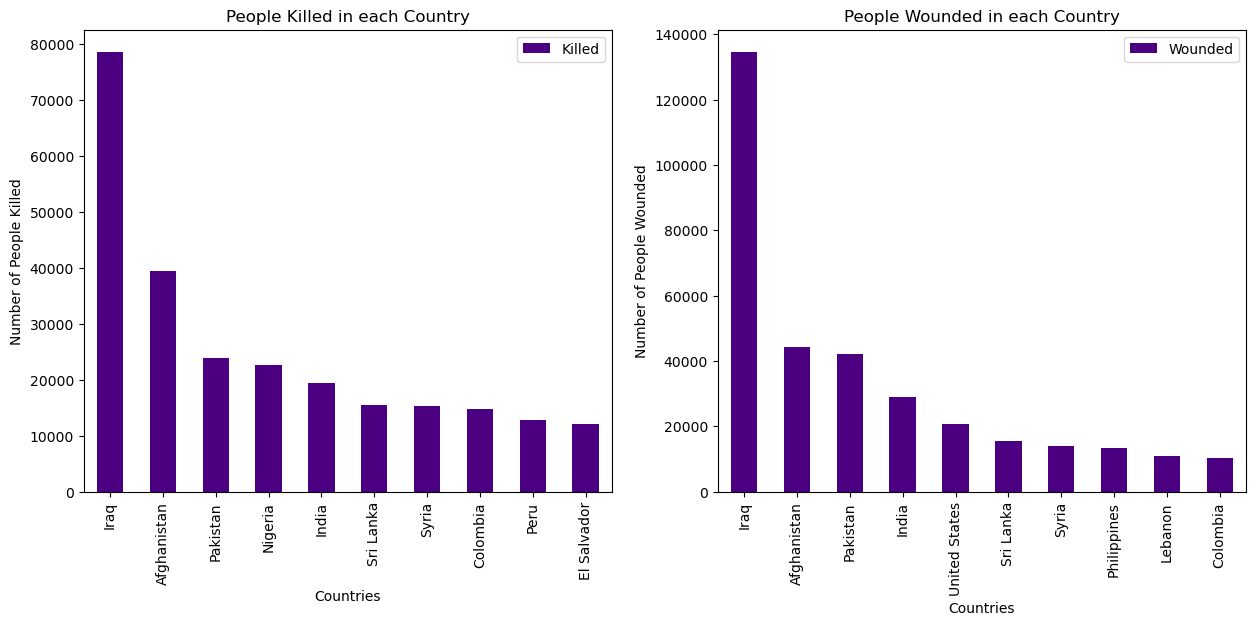

In [36]:
# People Killed and Wounded in each Country Visualization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

# Killed in each country visualization
ck[:10].plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

# Wounded in each country visualization
cw[:10].plot(kind="bar",color="indigo",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#### Observation: The highest number of people were killed and wounded in Iraq

In [37]:
# Top 10 States with most number of attacks
state = updated_terrorism["State"].value_counts()[1:11] # to display the first 10 rows
state

Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Lima                  2615
Name: State, dtype: int64

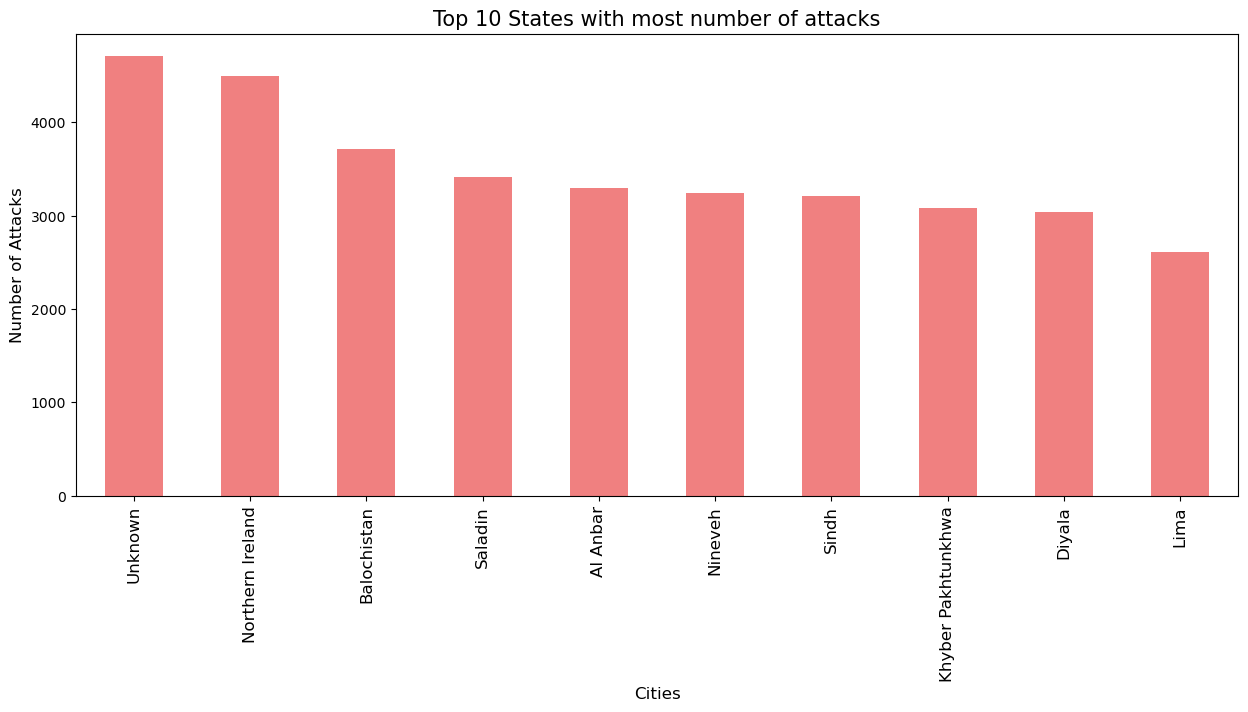

In [38]:
# Top 10 States with most number of attacks Visualization
state.plot(kind="bar",color="lightcoral",figsize=(15,6))
plt.title("Top 10 States with most number of attacks",fontsize=15)
plt.xlabel("Cities",fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

In [39]:
# Top 10 Cities with most number of attacks
city = updated_terrorism["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

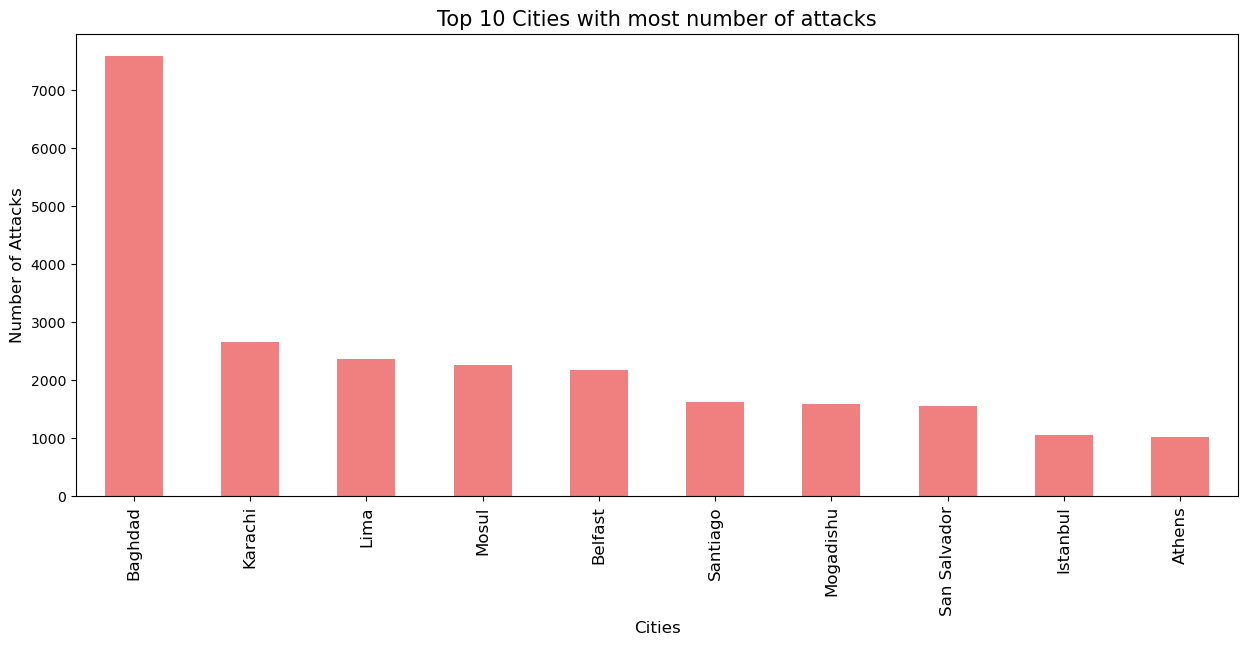

In [40]:
# Top 10 Cities with most number of attacks Visualization
city.plot(kind="bar",color="lightcoral",figsize=(15,6))
plt.title("Top 10 Cities with most number of attacks",fontsize=15)
plt.xlabel("Cities",fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

#### Observation: Baghdad was the most attacked city by the terrorist groups

In [41]:
# Top 15 Terrorist Groups with most number of successful attacks
s = updated_terrorism[updated_terrorism['Success'] != 'Unknown'][["GroupName","Success"]].groupby("GroupName").sum().sort_values('Success', ascending=False)
s.head(15)

,Success
GroupName,
Unknown,71748
Taliban,6680
Islamic State of Iraq and the Levant (ISIL),4759
Shining Path (SL),4337
Farabundo Marti National Liberation Front (FMLN),3317
Al-Shabaab,3016
New People's Army (NPA),2457
Revolutionary Armed Forces of Colombia (FARC),2302
Irish Republican Army (IRA),2282


#### Observation: Taliban has the most number of successful attacks

In [42]:
# Attack Type
attack_type = updated_terrorism.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

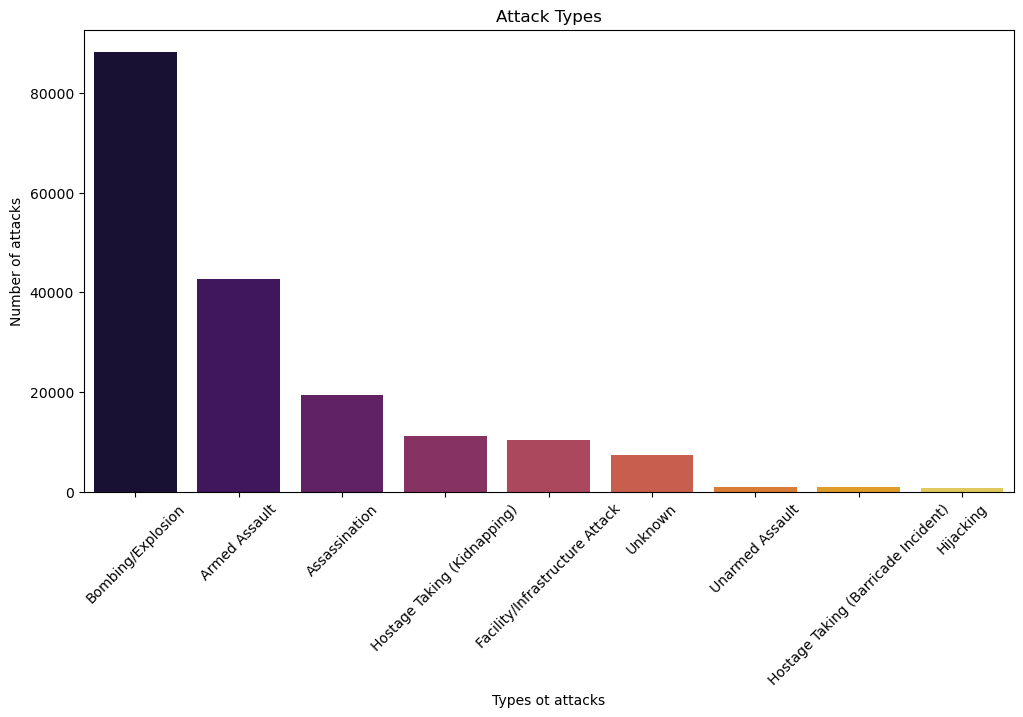

In [43]:
# Attack types 
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_type.index,y=attack_type.values,palette="inferno")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

#### Observation: Bombing/Explosion is the most common attack type used by the terrorist groups

In [44]:
# People Killed in each attack type
attack_killed = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'][['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,160297.0
Assassination,24920.0
Bombing/Explosion,157321.0
Facility/Infrastructure Attack,3642.0
Hijacking,3718.0
Hostage Taking (Barricade Incident),4478.0
Hostage Taking (Kidnapping),24231.0
Unarmed Assault,880.0
Unknown,32381.0


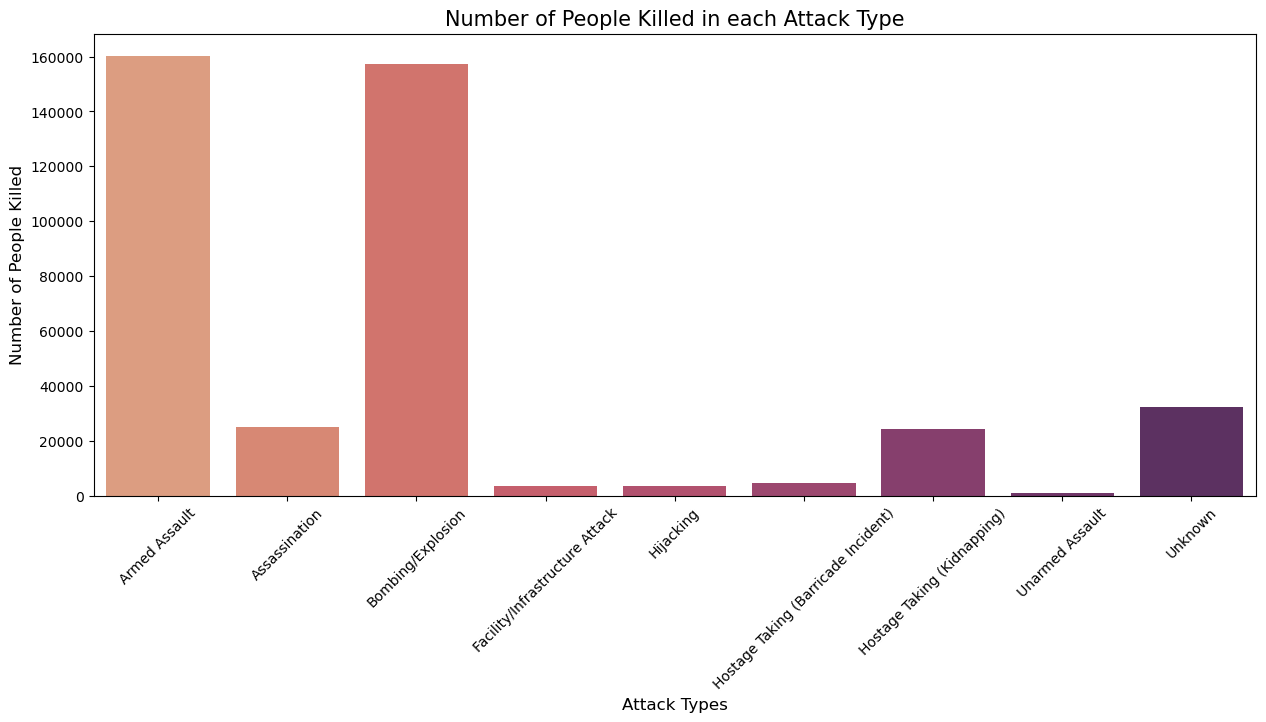

In [45]:
# People Killed in each attack type Visualization
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_killed.index,  y=attack_killed.Killed.values,palette="flare")
plt.title('Number of People Killed in each Attack Type', fontsize=15)
plt.xlabel('Attack Types', fontsize=12)
plt.ylabel('Number of People Killed', fontsize=12)
plt.xticks(rotation= 45)
plt.show()

#### Observation: Armed Assualt has killed the highest number of people, followed by Bombing/Explosion

In [46]:
# People Wounded in each attack type
attack_wounded = updated_terrorism[updated_terrorism['Wounded'] != 'Unknown'][['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77366.0
Assassination,13887.0
Bombing/Explosion,372686.0
Facility/Infrastructure Attack,3765.0
Hijacking,17001.0
Hostage Taking (Barricade Incident),3966.0
Hostage Taking (Kidnapping),6446.0
Unarmed Assault,14027.0
Unknown,14725.0


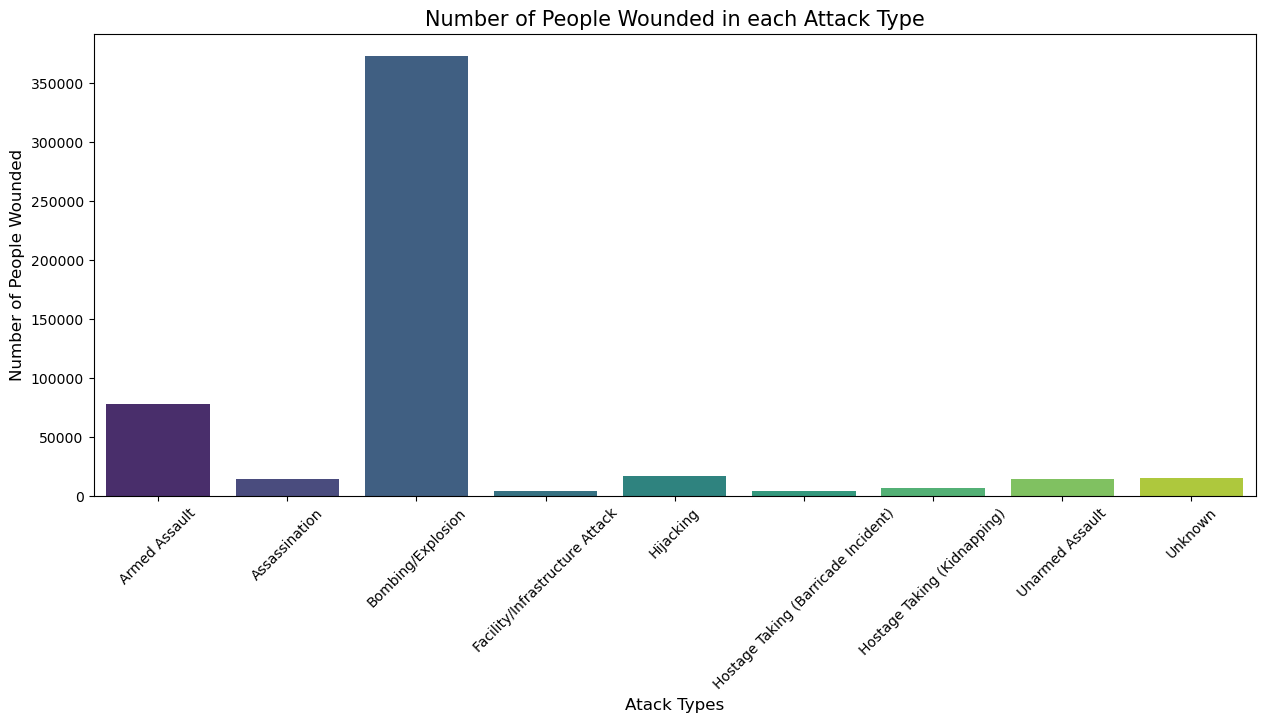

In [47]:
# People Wounded in each attack type Visualization
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_wounded.index, y=attack_wounded.Wounded.values,palette="viridis")
plt.title('Number of People Wounded in each Attack Type', fontsize=15)
plt.xlabel('Atack Types', fontsize=12)
plt.ylabel('Number of People Wounded', fontsize=12)
plt.xticks(rotation= 45)
plt.show()

#### Observation: Most of the people were wounded in Bombing/Explosion

In [48]:
# 10 most frequent Target Types
tt = updated_terrorism["TargetType"].value_counts()[:11]
tt

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Name: TargetType, dtype: int64

In [49]:
# 10 most frequent Targets
target = updated_terrorism[updated_terrorism['Target'] != 'Unknown']["Target"].value_counts()[:11]
target

Civilians        6461
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Convoy           1262
Unit             1195
Name: Target, dtype: int64

In [50]:
# Terrorist Attacks per Group
attack_grp = updated_terrorism["GroupName"].value_counts()[1:10]
attack_grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: GroupName, dtype: int64

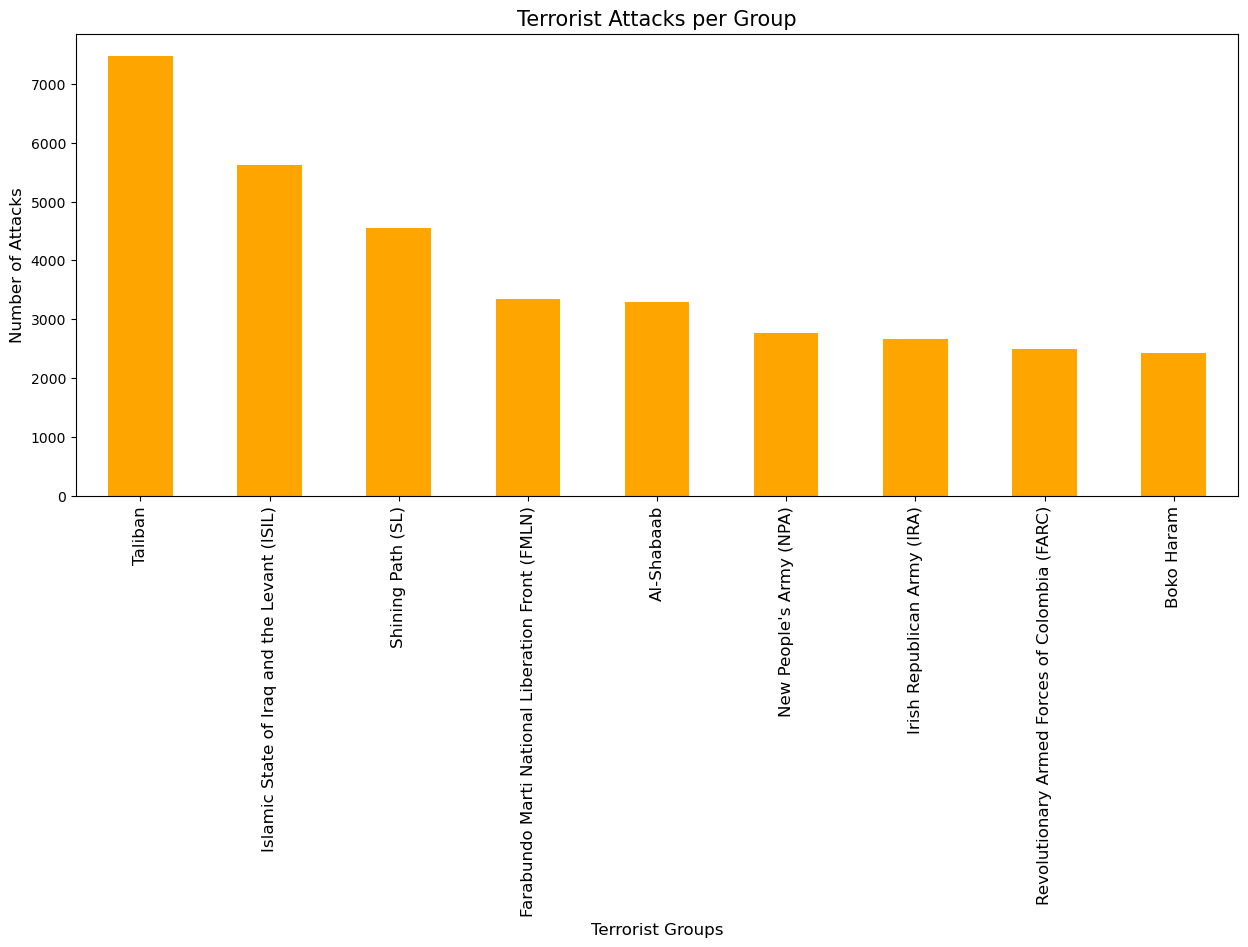

In [51]:
# Terrorist Attacks per Group Visualization
attack_grp.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Terrorist Attacks per Group",fontsize=15)
plt.xlabel("Terrorist Groups",fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

#### Observation: Taliban has carried out the largest number of terrorist attacks

In [52]:
# Number of each Weapon Type used
weapon = updated_terrorism["WeaponType"].value_counts()[1:11]
weapon

Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Name: WeaponType, dtype: int64

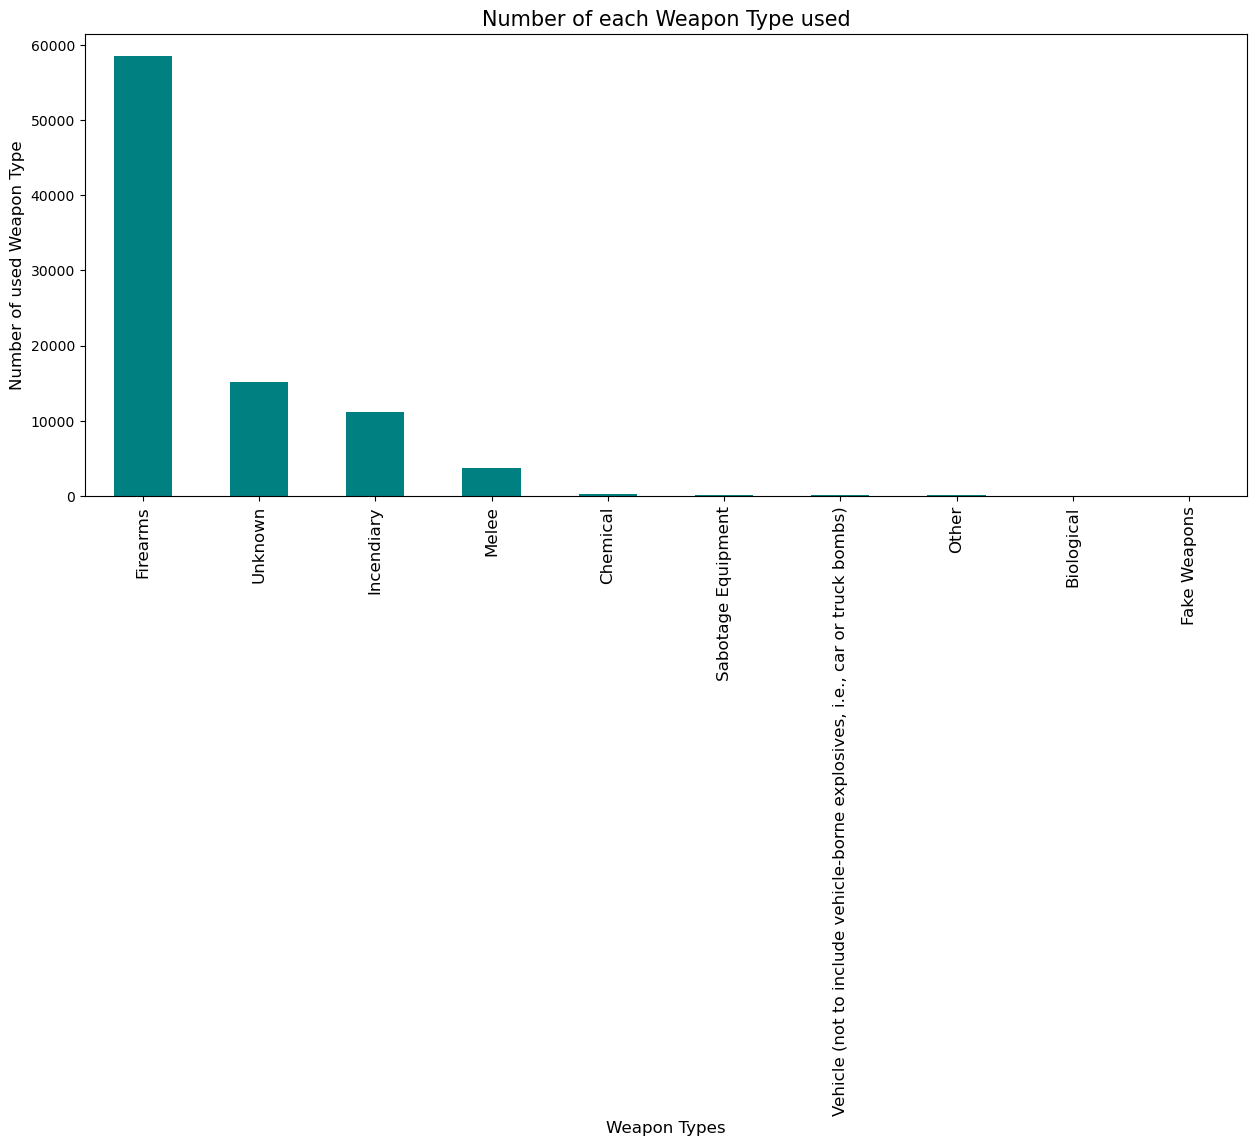

In [53]:
# Number of each Weapon Type used Visualization
weapon.plot(kind="bar",color="teal",figsize=(15,6))
plt.title("Number of each Weapon Type used",fontsize=15)
plt.xlabel("Weapon Types",fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Number of used Weapon Type",fontsize=12)
plt.show()

#### Observation: Firearms are the most used weapon type

In [54]:
# Total Number of people killed in terror attack
killData = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'].loc[:,'Killed']
tot = int(sum(killData.dropna()))
print('Number of people killed by terror attack:', tot) # drop the NaN values

Number of people killed by terror attack: 411868


In [55]:
# Total number of people killed each year
yk = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'][["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [56]:
# Total number of people wounded each year
yw = updated_terrorism[updated_terrorism['Wounded'] != 'Unknown'][['Year','Wounded']].groupby('Year').sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


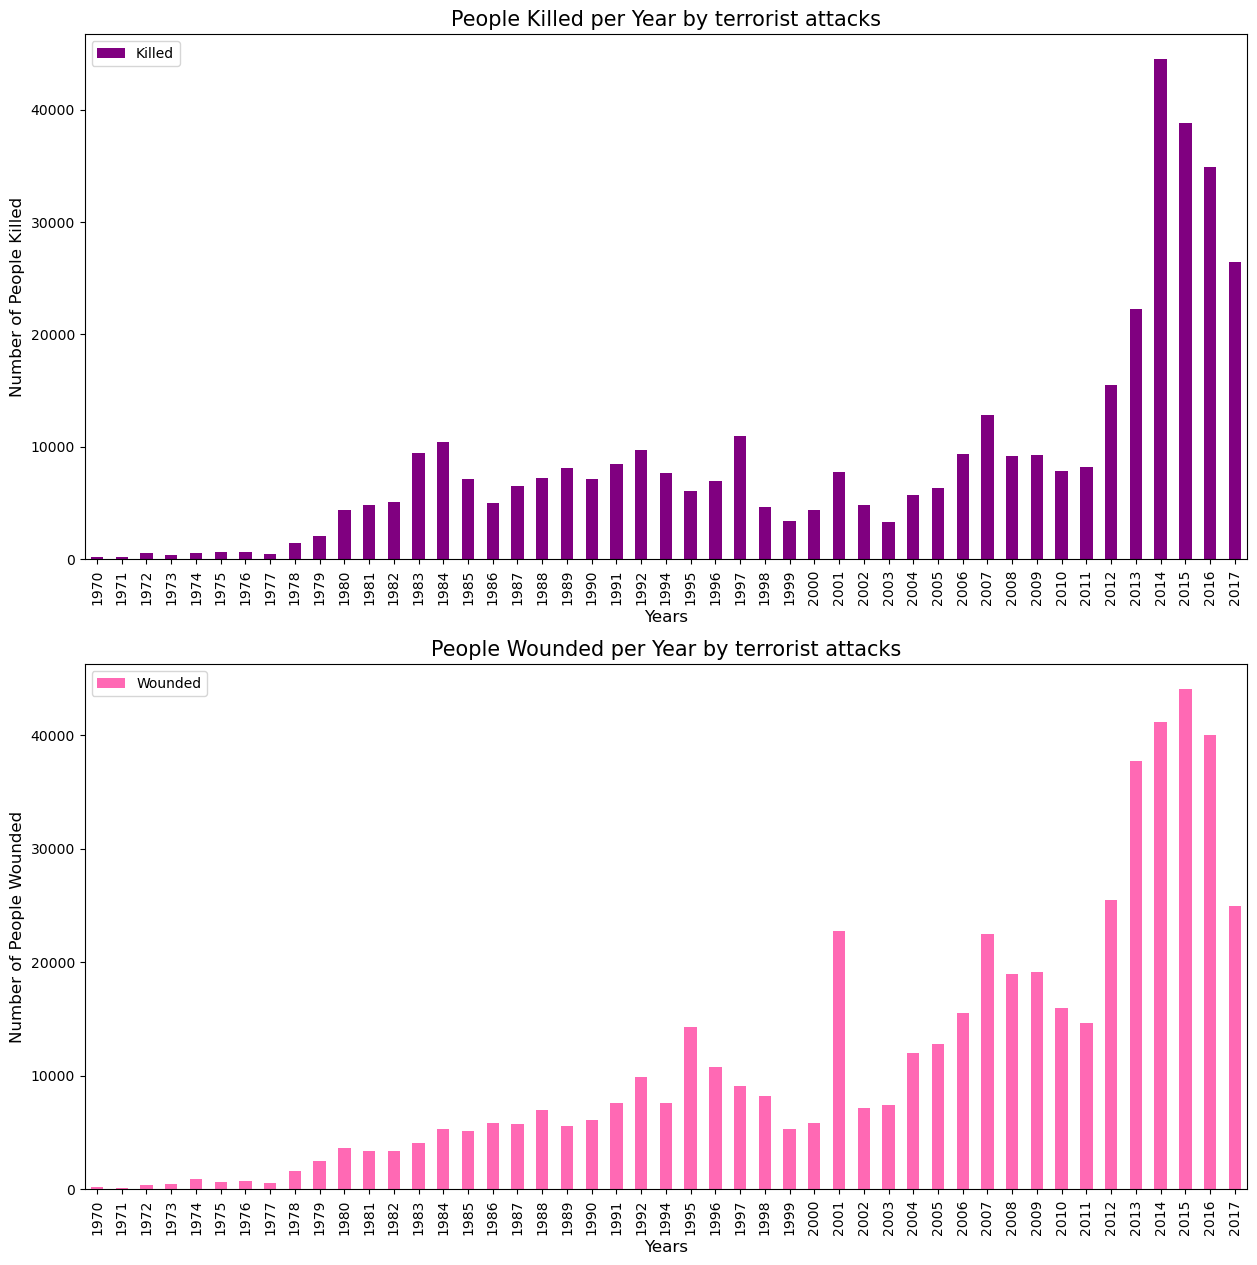

In [57]:
# People killed and wounded each year
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

# Killed in each year visualization
yk.plot(kind="bar",color="purple",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed per Year by terrorist attacks", fontsize=15)
ax0.set_xlabel("Years", fontsize=12)
ax0.set_ylabel("Number of People Killed", fontsize=12) 

# Wounded in each year visualization
yw.plot(kind="bar",color="hotpink",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded per Year by terrorist attacks", fontsize=15)
ax1.set_xlabel("Years", fontsize=12)
ax1.set_ylabel("Number of People Wounded", fontsize=12)

plt.show()

In [58]:
# People Killed by each Terrorist Group
group_killed = updated_terrorism[updated_terrorism['Killed'] != 'Unknown'][['GroupName','Killed']].groupby(['GroupName'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed

,Killed
GroupName,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


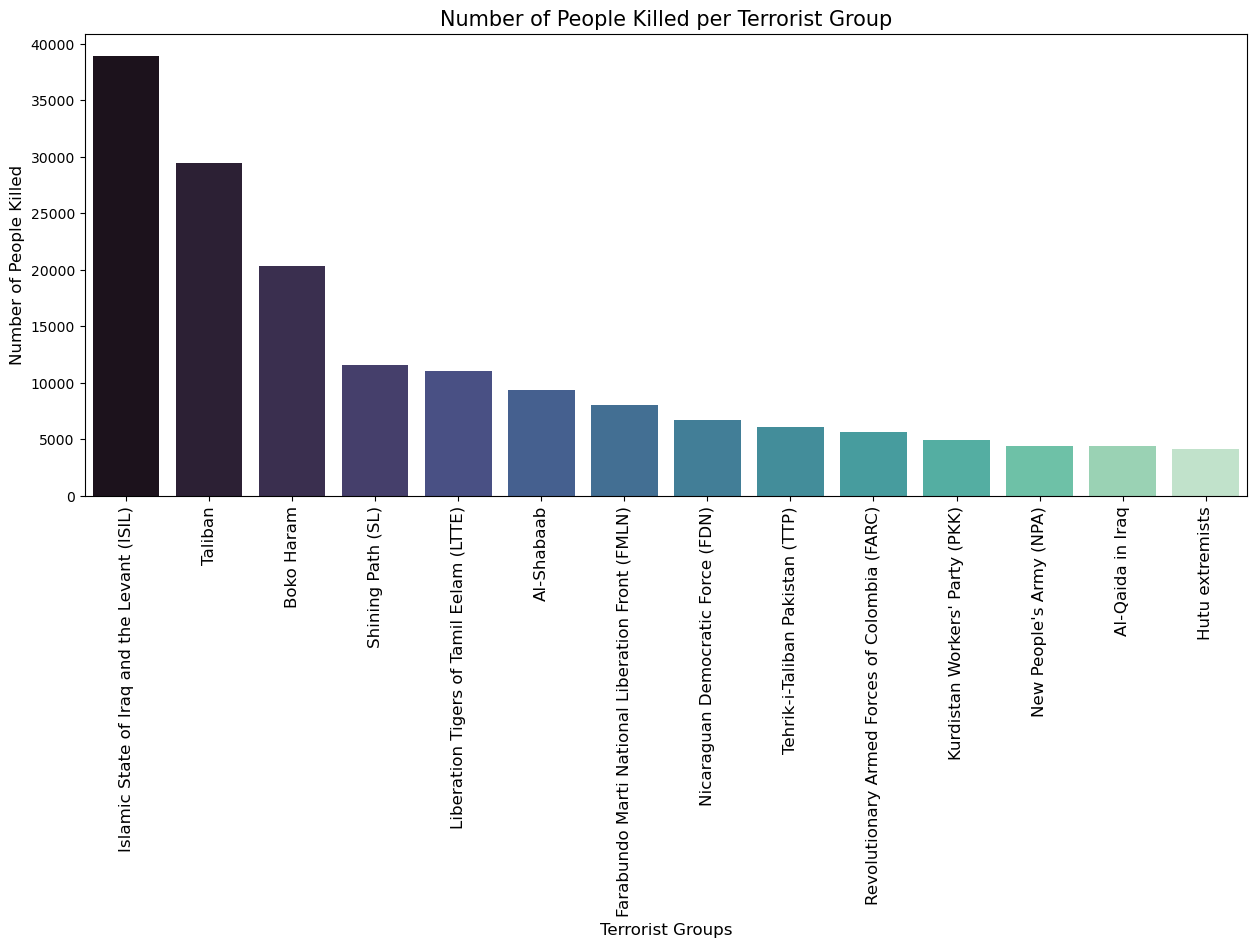

In [59]:
# People Killed by each Terrorist Group Visualization
plt.subplots(figsize=(15,6))
# Filtering the data to exclude the group name 'Unknown'
filtered_data = group_killed[group_killed.index != 'Unknown']
sns.barplot(x=filtered_data.index,y=filtered_data.Killed.values,palette="mako")
plt.title('Number of People Killed per Terrorist Group',fontsize=15)
plt.xlabel('Terrorist Groups',fontsize=12)
plt.ylabel('Number of People Killed',fontsize=12)
plt.xticks(rotation= 90,fontsize=12)
plt.show()

In [60]:
# People Wounded by each Terrorist Group
group_wounded = updated_terrorism[updated_terrorism['Wounded'] != 'Unknown'][['GroupName','Wounded']].groupby(['GroupName'],axis=0).sum().sort_values('Wounded', ascending=False).head(15)
group_wounded

,Wounded
GroupName,
Unknown,210339.0
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0


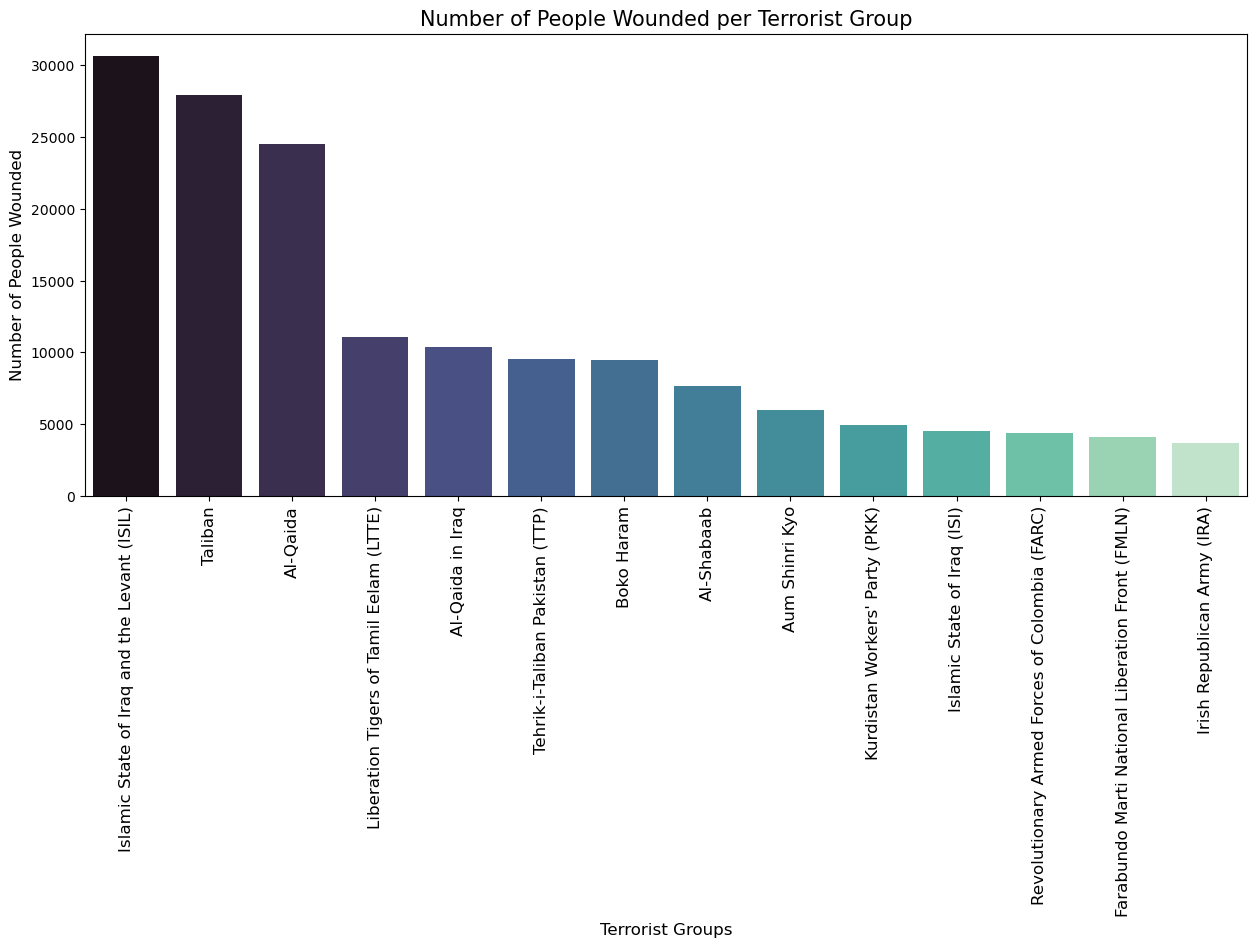

In [61]:
# People Wounded by each Terrorist Group Visualization
plt.subplots(figsize=(15,6))
# Filtering the data to exclude the group name 'Unknown'
filtered_data = group_wounded[group_wounded.index != 'Unknown']
sns.barplot(x=filtered_data.index,y=filtered_data.Wounded.values,palette="mako")
plt.title('Number of People Wounded per Terrorist Group',fontsize=15)
plt.xlabel('Terrorist Groups',fontsize=12)
plt.ylabel('Number of People Wounded',fontsize=12)
plt.xticks(rotation= 90,fontsize=12)
plt.show()